In [ ]:
# Call libraries
# Data manipulation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# For plotting NN model
#!pip install graphviz
#!pip install pydot
from skimage import io
import pydot

# Keras model components
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, concatenate, GRU, Embedding, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

# For text (word) to integer transformation
from tensorflow.keras.preprocessing.text import Tokenizer

# For making all integer sequences of equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import backend to invoke tensorflow commands to manipulate tensors
from tensorflow.keras import backend as K

# Plotting libraries
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline 

# Misc
import math, time, os,gc

# Print all outputs from a cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
path = "/content/drive/MyDrive/Project 1/"

In [ ]:
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")

In [ ]:
print("---")
print(f"train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print("---\n")

print(f"train Memory Usage : {sum(train.memory_usage())/10**6} MB")   # In MB
print(f"test Memory Usage : {sum(test.memory_usage())/10**6} MB")    # In MB
print("-----\n")

print(f"Train Null columns: \n {train.isnull().sum().sort_values()}")
print(f"Test Null columns: \n {test.isnull().sum().sort_values()}" )

---
train shape: (43957, 17)
Test shape: (899, 17)
---

train Memory Usage : 5.97828 MB
test Memory Usage : 0.122392 MB
-----

Train Null columns: 
 age                    0
income_level           0
hours_per_week         0
capital_loss           0
capital_gain           0
gender                 0
relationship           0
race                   0
marital_status         0
educational_num        0
education              0
fnlwgt                 0
native_country       763
workclass           2498
occupation          2506
Unnamed: 15        43957
Unnamed: 16        43957
dtype: int64
Test Null columns: 
 age                  0
native_country       0
hours_per_week       0
capital_loss         0
capital_gain         0
gender               0
relationship         0
race                 0
marital_status       0
educational_num      0
education            0
fnlwgt               0
workclass            0
occupation           0
Unnamed: 15        899
income_level       899
Unnamed: 16        899
d

### **Data Exploration**

In [ ]:
train.dtypes
test.dtypes
train.columns.values

age                  int64
workclass           object
fnlwgt               int64
education           object
educational_num      int64
marital_status      object
occupation          object
relationship        object
race                object
gender              object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
income_level         int64
Unnamed: 15        float64
Unnamed: 16        float64
dtype: object

age                  int64
workclass           object
fnlwgt               int64
education           object
educational_num      int64
marital_status      object
occupation          object
relationship        object
race                object
gender              object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
income_level       float64
Unnamed: 15        float64
Unnamed: 16        float64
dtype: object

array(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_level', 'Unnamed: 15', 'Unnamed: 16'], dtype=object)

In [ ]:
test=test.dropna(how='all', axis='columns')
train=train.dropna(how='all', axis='columns')

In [ ]:
train.describe(include='all')

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_level
count,43957.000000,41459,4.395700e+04,43957,43957.000000,43957,41451,43957,43957,43957,43957.000000,43957.000000,43957.000000,43194,43957.000000
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,30587,NaN,14197,NaN,20147,5519,17749,37572,29400,NaN,NaN,NaN,39429,NaN
mean,38.617149,NaN,1.896730e+05,NaN,10.074118,NaN,NaN,NaN,NaN,NaN,1093.559797,88.246491,40.407694,NaN,0.239279
std,13.734401,NaN,1.058215e+05,NaN,2.575092,NaN,NaN,NaN,NaN,NaN,7570.536063,404.588410,12.400303,NaN,0.426648
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.174960e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.781000e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.376710e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


### **Checking Missing Values**

In [ ]:
def fill_missing(dataset):
    dataset.native_country.fillna(value="missing", inplace=True)
    dataset.workclass.fillna(value="missing", inplace=True)
    dataset.occupation.fillna(value="missing", inplace=True)
    return (dataset)

In [ ]:
train = fill_missing(train)

### **Checking duplicates**

In [ ]:
display(train.loc[train.duplicated()].head())

#it seems like there is no relationship among values, that's why we will remove duplicates
train.drop_duplicates(inplace=True)
print('The number of duplicates in the data is ', train.duplicated().sum())

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_level
1650,29,missing,41281,Bachelors,13,Married-spouse-absent,missing,Not-in-family,White,Male,0,0,50,United-States,0
6915,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,0
8362,19,Private,318822,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
12669,22,Private,137876,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,20,United-States,0
13408,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0


The number of duplicates in the data is  0


### **Checking outliers**

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'The boxcharts for the age and hours-per-week columns')

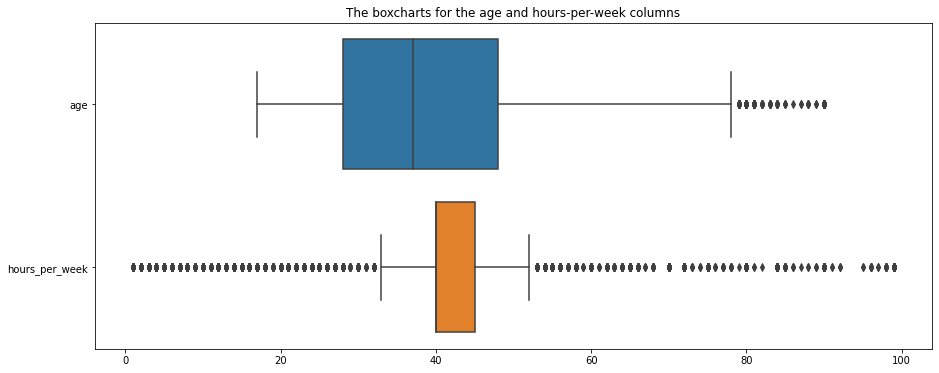

In [ ]:
plt.figure(figsize=(15,6))
plt.title(f'The boxcharts for the age and hours-per-week columns')
sns.boxplot( data=train[['age', 'hours_per_week']], orient='h')
plt.show()

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'The histogram for the capital-gain and capital-loss columns')

Text(0, 0.5, 'The number of entries')

Text(0.5, 0, 'Capital in $')

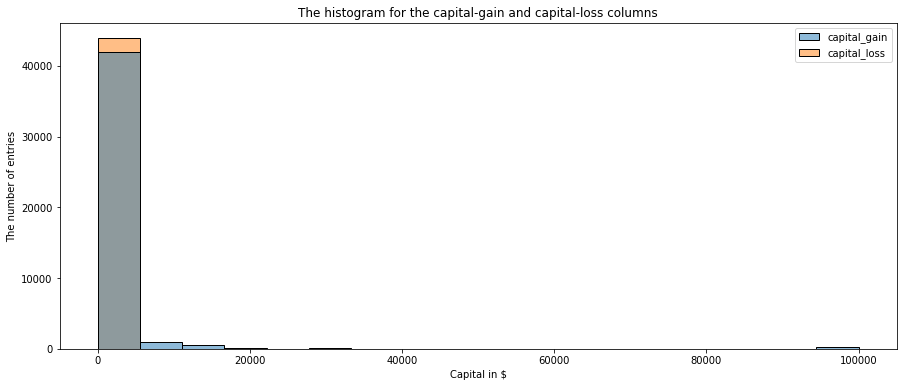

In [ ]:
plt.figure(figsize=(15,6))
plt.title(f'The histogram for the capital-gain and capital-loss columns')
sns.histplot( data=train[['capital_gain','capital_loss']])
plt.ylabel('The number of entries')
plt.xlabel('Capital in $')
plt.show()

* There are 32561 entries and 15 columns;
* It seems like there are no errors in the data (for example, too high ot too low age values);
* There were missing values in the data which were removed;
* The 'capital-gain','capital-loss' columns has some outliers, which has to be examined properly at the EDA stage;
* We have 9 categorical including the target column (income) and six quantitative columns.

* The min age is 17, the max age is 90;
* The top worklass is 'Private';
* the most frequent education type is "Prof-specialty";
* White race and male sex are top in the corresponding columns;
* The mean value and 50% of hours-per-week are 40.44 and 40.00$ (it is like normal distribution);
* The most common type of income is less than or equals to 50k.

### **Data Exploration**

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'The boxplot for the capital_gain and capital_loss columns')

Text(0, 0.5, 'The number of entries')

Text(0.5, 0, 'Capital in $')

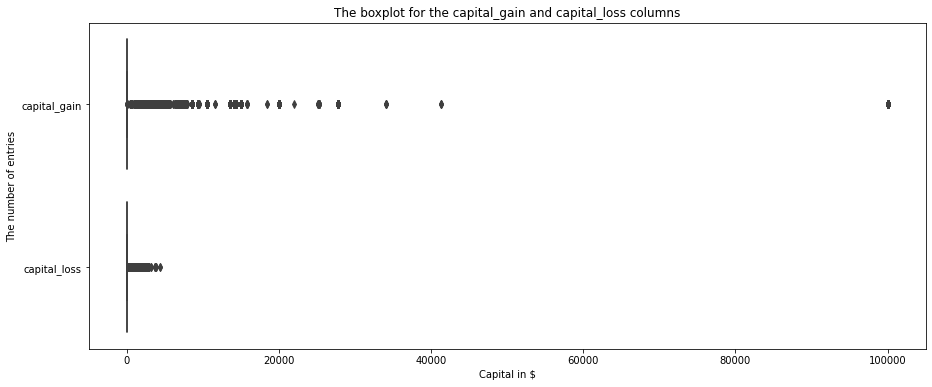

In [ ]:
plt.figure(figsize=(15,6))
plt.title(f'The boxplot for the capital_gain and capital_loss columns')
sns.boxplot( data=train[['capital_gain','capital_loss']], orient='h')
plt.ylabel('The number of entries')
plt.xlabel('Capital in $')
plt.show()

Observation: all entries with the highest capital gain have >50k income value. That's why we couldn't delete these values

In [ ]:
# Who has more than 90000 capital-gain?
Q3 = train['capital_gain'].quantile(0.75)
capital_g_high = train.query('capital_gain > @Q3')
capital_g_max = train.query('capital_gain > 99000')

Q3 = train['capital_loss'].quantile(0.9)
capital_l_high = train.query('capital_loss > @Q3')
capital_l_max = train.query('capital_loss >= 4356')

display(capital_g_max.describe(include='all'))

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_level
count,228.000000,228,228.000000,228,228.000000,228,228,228,228,228,228.0,228.0,228.000000,228,228.0
unique,NaN,7,NaN,11,NaN,7,13,5,4,2,NaN,NaN,NaN,11,NaN
top,NaN,Private,NaN,Prof-school,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,117,NaN,65,NaN,181,96,165,201,193,NaN,NaN,NaN,205,NaN
mean,46.473684,NaN,185584.087719,NaN,13.061404,NaN,NaN,NaN,NaN,NaN,99999.0,0.0,50.618421,NaN,1.0
std,10.828019,NaN,101087.836805,NaN,2.464855,NaN,NaN,NaN,NaN,NaN,0.0,0.0,12.868327,NaN,0.0
min,21.000000,NaN,22743.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,99999.0,0.0,20.000000,NaN,1.0
25%,40.000000,NaN,117369.750000,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,99999.0,0.0,40.000000,NaN,1.0
50%,46.500000,NaN,171244.000000,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,99999.0,0.0,50.000000,NaN,1.0
75%,52.000000,NaN,224052.250000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,99999.0,0.0,60.000000,NaN,1.0


the higher capital gain the higher income and vice versa.

Text(0.5, 1.0, 'Distributions for each variable')

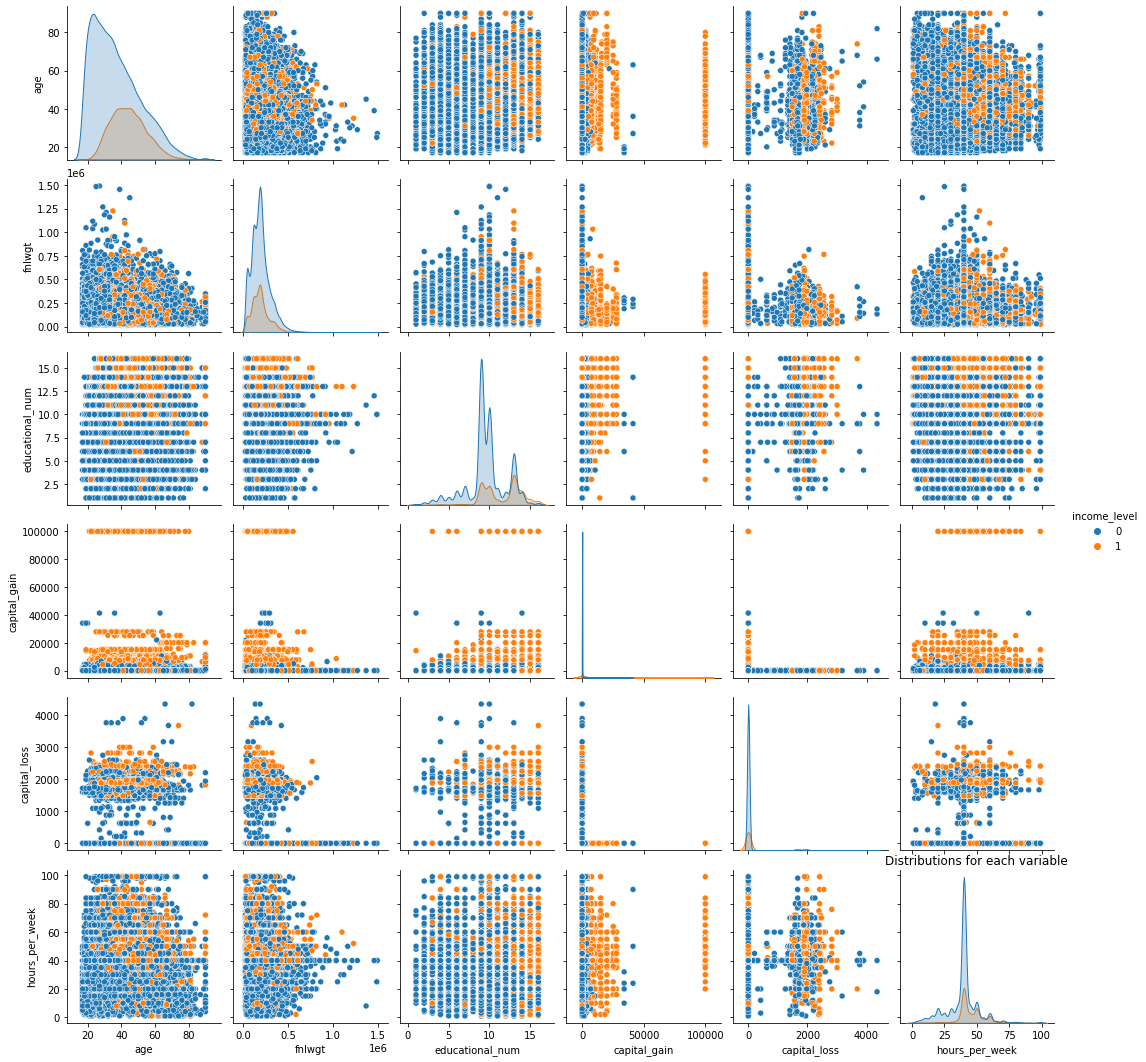

In [ ]:
sns.pairplot(data=train, hue="income_level")
plt.title('Distributions for each variable')
plt.show()

Text(0.5, 0.98, 'Relation between the categorical features and income')

No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


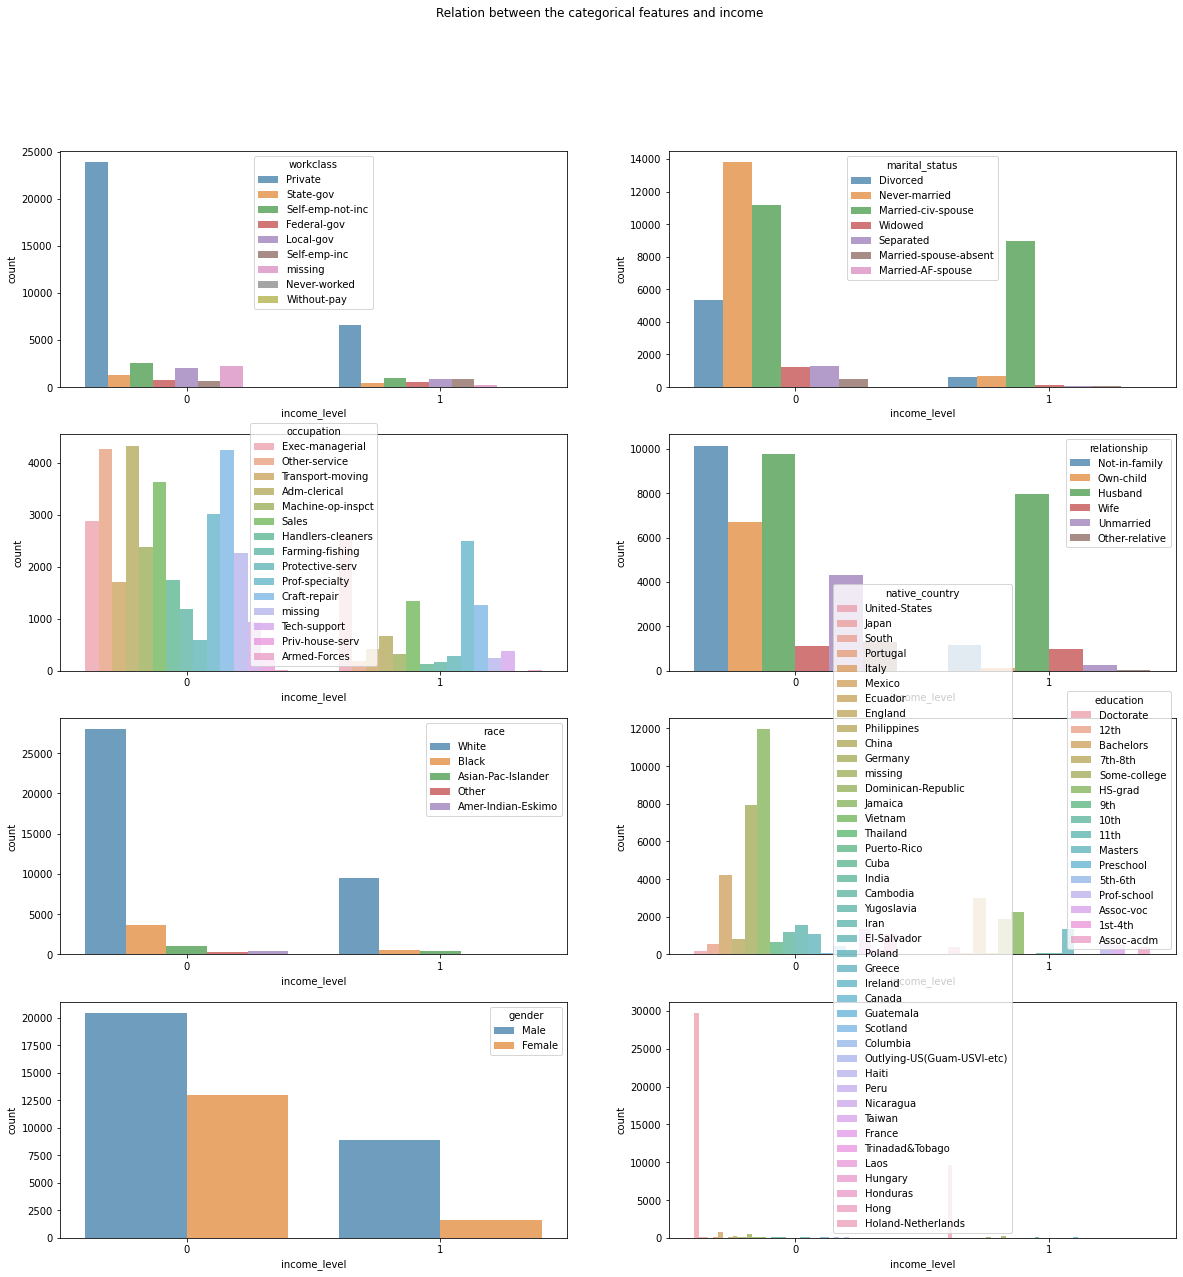

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(20,20))
axs = axs.flatten()
fig.suptitle('Relation between the categorical features and income')

categorical2 = ['workclass', 'marital_status','occupation','relationship','race', 'education', 'gender','native_country']
for ax, i in enumerate(categorical2):
    plt.legend( bbox_to_anchor=(1.1, 1.1), loc='upper left')
    sns.countplot(x='income_level', alpha=0.7, hue=i, data=train, ax=axs[ax])

In [ ]:
display(train.groupby('marital_status').agg({'age' : ['mean', 'median']}))
display(train.groupby('income_level').agg({'age' : ['mean', 'median']}))

age       
                            mean median
marital_status                         
Divorced               43.185992     42
Married-AF-spouse      31.548387     30
Married-civ-spouse     43.321762     42
Married-spouse-absent  40.876977     40
Never-married          28.117724     25
Separated              39.529023     38
Widowed                59.250733     60

age       
                   mean median
income_level                  
0             36.847870     34
1             44.274898     43

* Federal and Local gov. occupations are more likely to get the higher salary;

* Occupation Private house serving is less likely to aim >50k income;

* Never married people has low chances to get the higher salary in comparison to the <50k value

* Husbands have big chances to get >50k income (also check sex barplot);

* Most people with high income are in family or were in family, it is related to the fact the mean age is higher and it is more likey that you're not Not-in-Family.

### **Label Encoding**

In [ ]:
#Merge 1D category data of train & test into one array:
gender_array = np.hstack([train.gender.values, test.gender.values])
country_array = np.hstack([train.native_country.values, test.native_country.values])
race_array = np.hstack([train.race.values, test.race.values])
edu_array = np.hstack([train.education.values, test.education.values])
occ_array = np.hstack([train.occupation.values, test.occupation.values])
marital_array = np.hstack([train.marital_status.values, test.marital_status.values])
rel_array = np.hstack([train.relationship.values, test.relationship.values])
class_array = np.hstack([train.workclass.values, test.workclass.values])

In [ ]:
le = LabelEncoder()

le.fit(gender_array)
train.gender = le.transform(train.gender.values)
test.gender = le.transform(test.gender.values)

le.fit(country_array)
train.native_country = le.transform(train.native_country.values)
test.native_country = le.transform(test.native_country.values)

le.fit(race_array)
train.race = le.transform(train.race.values)
test.race = le.transform(test.race.values)

le.fit(edu_array)
train.education = le.transform(train.education.values)
test.education = le.transform(test.education.values)

le.fit(occ_array)
train.occupation = le.transform(train.occupation.values)
test.occupation = le.transform(test.occupation.values)

le.fit(marital_array)
train.marital_status = le.transform(train.marital_status.values)
test.marital_status = le.transform(test.marital_status.values)

le.fit(rel_array)
train.relationship = le.transform(train.relationship.values)
test.relationship = le.transform(test.relationship.values)

le.fit(class_array)
train.workclass = le.transform(train.workclass.values)
test.workclass = le.transform(test.workclass.values)

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [ ]:
del le, gender_array,country_array, race_array, edu_array, occ_array,marital_array,rel_array,class_array 
gc.collect()

1258

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02ee581190>]],
      dtype=object)

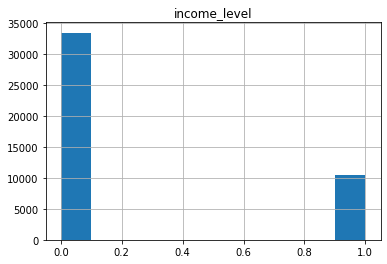

In [ ]:
pd.DataFrame(train.income_level).hist()

### **Scaling**

In [ ]:
ss= MinMaxScaler(feature_range=(-1, 1))
train["age"] = ss.fit_transform(train.age.values.reshape(-1, 1))

In [ ]:
train["capital_gain"] = ss.fit_transform(train.capital_gain.values.reshape(-1, 1))
train["capital_loss"] = ss.fit_transform(train.capital_loss.values.reshape(-1, 1))
train["hours_per_week"] = ss.fit_transform(train.hours_per_week.values.reshape(-1, 1))
train["educational_num"] = ss.fit_transform(train.educational_num.values.reshape(-1, 1))

In [ ]:
train.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,0.369863,3,366425,10,1.000000,0,3,1,4,1,1.0,-1.0,0.204082,38,1
1,-1.000000,3,244602,2,-0.066667,4,7,3,4,1,-1.0,-1.0,-0.714286,38,0
2,-0.616438,3,174201,9,0.600000,2,3,0,4,1,-1.0,-1.0,-0.204082,38,1
3,0.123288,6,110199,5,-0.600000,2,13,0,4,1,-1.0,-1.0,-0.204082,38,0
4,-0.780822,6,149248,15,0.200000,4,7,1,2,1,-1.0,-1.0,-0.204082,38,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0302376310>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02ee5cf910>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f030349cad0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02f9f80f50>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02f2351e90>]],
      dtype=object)

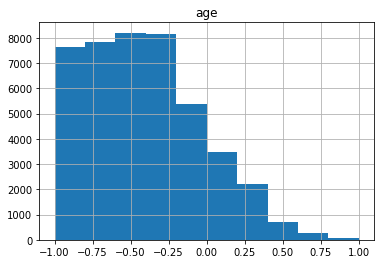

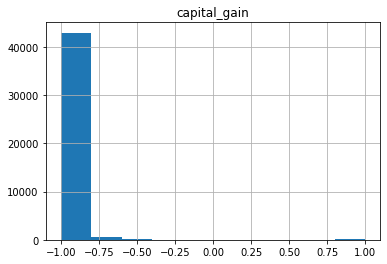

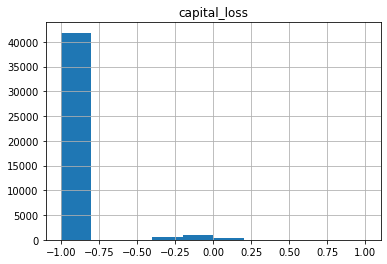

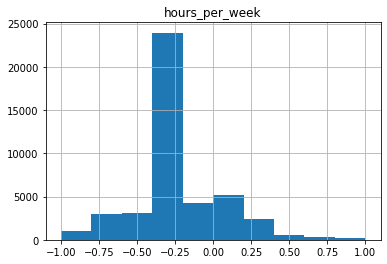

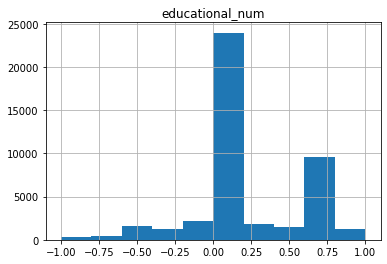

In [ ]:
pd.DataFrame(train.age).hist()
pd.DataFrame(train.capital_gain).hist()
pd.DataFrame(train.capital_loss).hist()
pd.DataFrame(train.hours_per_week).hist()
pd.DataFrame(train.educational_num).hist()

### **Train-Test Split**

In [ ]:
dtrain, dvalid = train_test_split(train,
                                  random_state=123,
                                  train_size=0.99    # 99% vs 1%
                                 )

print(dtrain.shape)     
print(dvalid.shape)     

(43472, 15)
(440, 15)


In [ ]:
def get_callbacks(patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True)
    return [es, msave]

### **Modelling**

In [ ]:
cat2vec_size = 10
cond2vec_size = 5

In [ ]:
def get_keras_data(dataset):
    X = {
        'country_in':     np.array(dataset.native_country),
        'edu_in':     np.array(dataset.education),# 3
        'class_in':  dataset.workclass.values,                                                # 4
        'gender_in': dataset.gender.values,
        'race_in': dataset.race.values,
        'rel_in': dataset.relationship.values,
        'occ_in': dataset.occupation.values,
        'mar_in': dataset.marital_status.values,
        'num_vars_in':       np.array(dataset[['age', 'capital_gain','capital_loss', 'hours_per_week', 'educational_num']])    # Two numeric columns here   # 6
    }
    return X

In [ ]:
X_train = get_keras_data(dtrain)

In [ ]:
X_train.keys()

dict_keys(['country_in', 'edu_in', 'class_in', 'gender_in', 'race_in', 'rel_in', 'occ_in', 'mar_in', 'num_vars_in'])

In [ ]:
X_valid = get_keras_data(dvalid)
X_test = get_keras_data(test)

In [ ]:
country =      Input(shape=[1],                             name="country_in")     # Just 1 feature. Hence shape=[1]
edu =   Input(shape=[1],                             name="edu_in")  # Just 1 feature. Hence shape=[1]
workclass =  Input(shape=[1],                             name="class_in") # Just 1 feature. Hence shape = [1]
gender =      Input(shape=[1],                             name="gender_in")     # Just 1 feature. Hence shape=[1]
race =   Input(shape=[1],                             name="race_in")  # Just 1 feature. Hence shape=[1]
rel =  Input(shape=[1],                             name="rel_in")
occ =   Input(shape=[1],                             name="occ_in")  # Just 1 feature. Hence shape=[1]
mar =  Input(shape=[1],                             name="mar_in")
num_vars =        Input(shape=[X_train["num_vars_in"].shape[1],1],  name="num_vars_in")


In [ ]:
MAX_country_VOC = np.max(
                           [
                             train.native_country.max(),
                             test.native_country.max()
                           ]
                          ) + 1

MAX_race_VOC = np.max(
                           [
                             train.race.max(),
                             test.race.max()
                           ]
                          ) + 1

MAX_edu_VOC = np.max(
                           [
                             train.education.max(),
                             test.education.max()
                           ]
                          ) + 1

MAX_rel_VOC = np.max(
                           [
                             train.relationship.max(),
                             test.relationship.max()
                           ]
                          ) + 1

MAX_mar_VOC = np.max(
                           [
                             train.marital_status.max(),
                             test.marital_status.max()
                           ]
                          ) + 1

MAX_occ_VOC = np.max(
                           [
                             train.occupation.max(),
                             test.occupation.max()
                           ]
                          ) + 1

MAX_class_VOC = np.max(
                           [
                             train.workclass.max(),
                             test.workclass.max()
                           ]
                          ) + 1

MAX_gender_VOC = np.max(
                           [
                             train.gender.max(),
                             test.gender.max()
                           ]
                          ) + 1

In [ ]:
from keras.layers import LSTM

In [ ]:
emb_country =     Embedding(MAX_country_VOC,     cat2vec_size  )(country)
emb_edu =  Embedding(MAX_edu_VOC,  cat2vec_size  )(edu)
emb_workclass = Embedding(MAX_class_VOC, cond2vec_size )(workclass)
emb_gender =     Embedding(MAX_gender_VOC,     cat2vec_size  )(gender)
emb_race =  Embedding(MAX_race_VOC,  cat2vec_size  )(race)
emb_rel = Embedding(MAX_rel_VOC, cond2vec_size )(rel)
emb_occ =  Embedding(MAX_occ_VOC,  cat2vec_size  )(occ)
emb_mar = Embedding(MAX_mar_VOC, cond2vec_size )(mar)

In [ ]:
countrylstm= LSTM(64)(emb_country)
edulstm= LSTM(64)(emb_edu)
workclasslstm= LSTM(64)(emb_workclass)
genderlstm= LSTM(64)(emb_gender)
racelstm= LSTM(64)(emb_race)
rellstm= LSTM(64)(emb_rel)
occlstm= LSTM(64)(emb_occ)
marlstm= LSTM(64)(emb_mar)

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf


x_left = layers.Conv1D(
                       filters = 32,
                       kernel_size=3,
                       activation='relu')(num_vars)


x_left = layers.Conv1D(
                       filters = 64,
                       kernel_size=3,
                       activation='relu'
                       )(x_left)
x_rt = layers.Conv1D(filters = 64, kernel_size=3,activation='relu')(num_vars)


x_rt = layers.Conv1D(filters = 128, kernel_size=3,activation='relu')(x_rt)
x1 = tf.keras.layers.concatenate([x_left,x_rt])

In [ ]:
main_l = concatenate(
                        [
                          Flatten() (countrylstm),
                          Flatten() (edulstm),
                          Flatten() (workclasslstm),
                          Flatten() (genderlstm),
                          Flatten() (racelstm),
                          Flatten() (rellstm),
                          Flatten() (occlstm),
                          Flatten() (marlstm),
                          Flatten()(x1)          # Feed numerical variables as they are
                        ])

In [ ]:
dr_r = 0.1   
#main_l = layers.Conv1D(
                       #filters = 32,
                       #kernel_size=3,
                       #activation='relu')(main_l)
# Add classification layer
main_l = Dense(1, activation='sigmoid') (main_l)
main_l = Dropout(dr_r)(main_l)
main_l = Dense(1, activation='sigmoid') (main_l)
main_l = Dropout(dr_r) (main_l)

In [ ]:
output = Dense(1, activation="sigmoid") (main_l)

In [ ]:
model = Model(
              inputs= [                     
                        country,
                        edu,
                        workclass,
                        gender,
                        race,
                        rel,
                        occ,
                        mar,
                        num_vars
                       ],
              outputs= output,
              )

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]    
              )

In [ ]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 num_vars_in (InputLayer)       [(None, 5, 1)]       0           []                               
                                                                                                  
 country_in (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 edu_in (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 class_in (InputLayer)          [(None, 1)]          0           []                               
                                                                                            

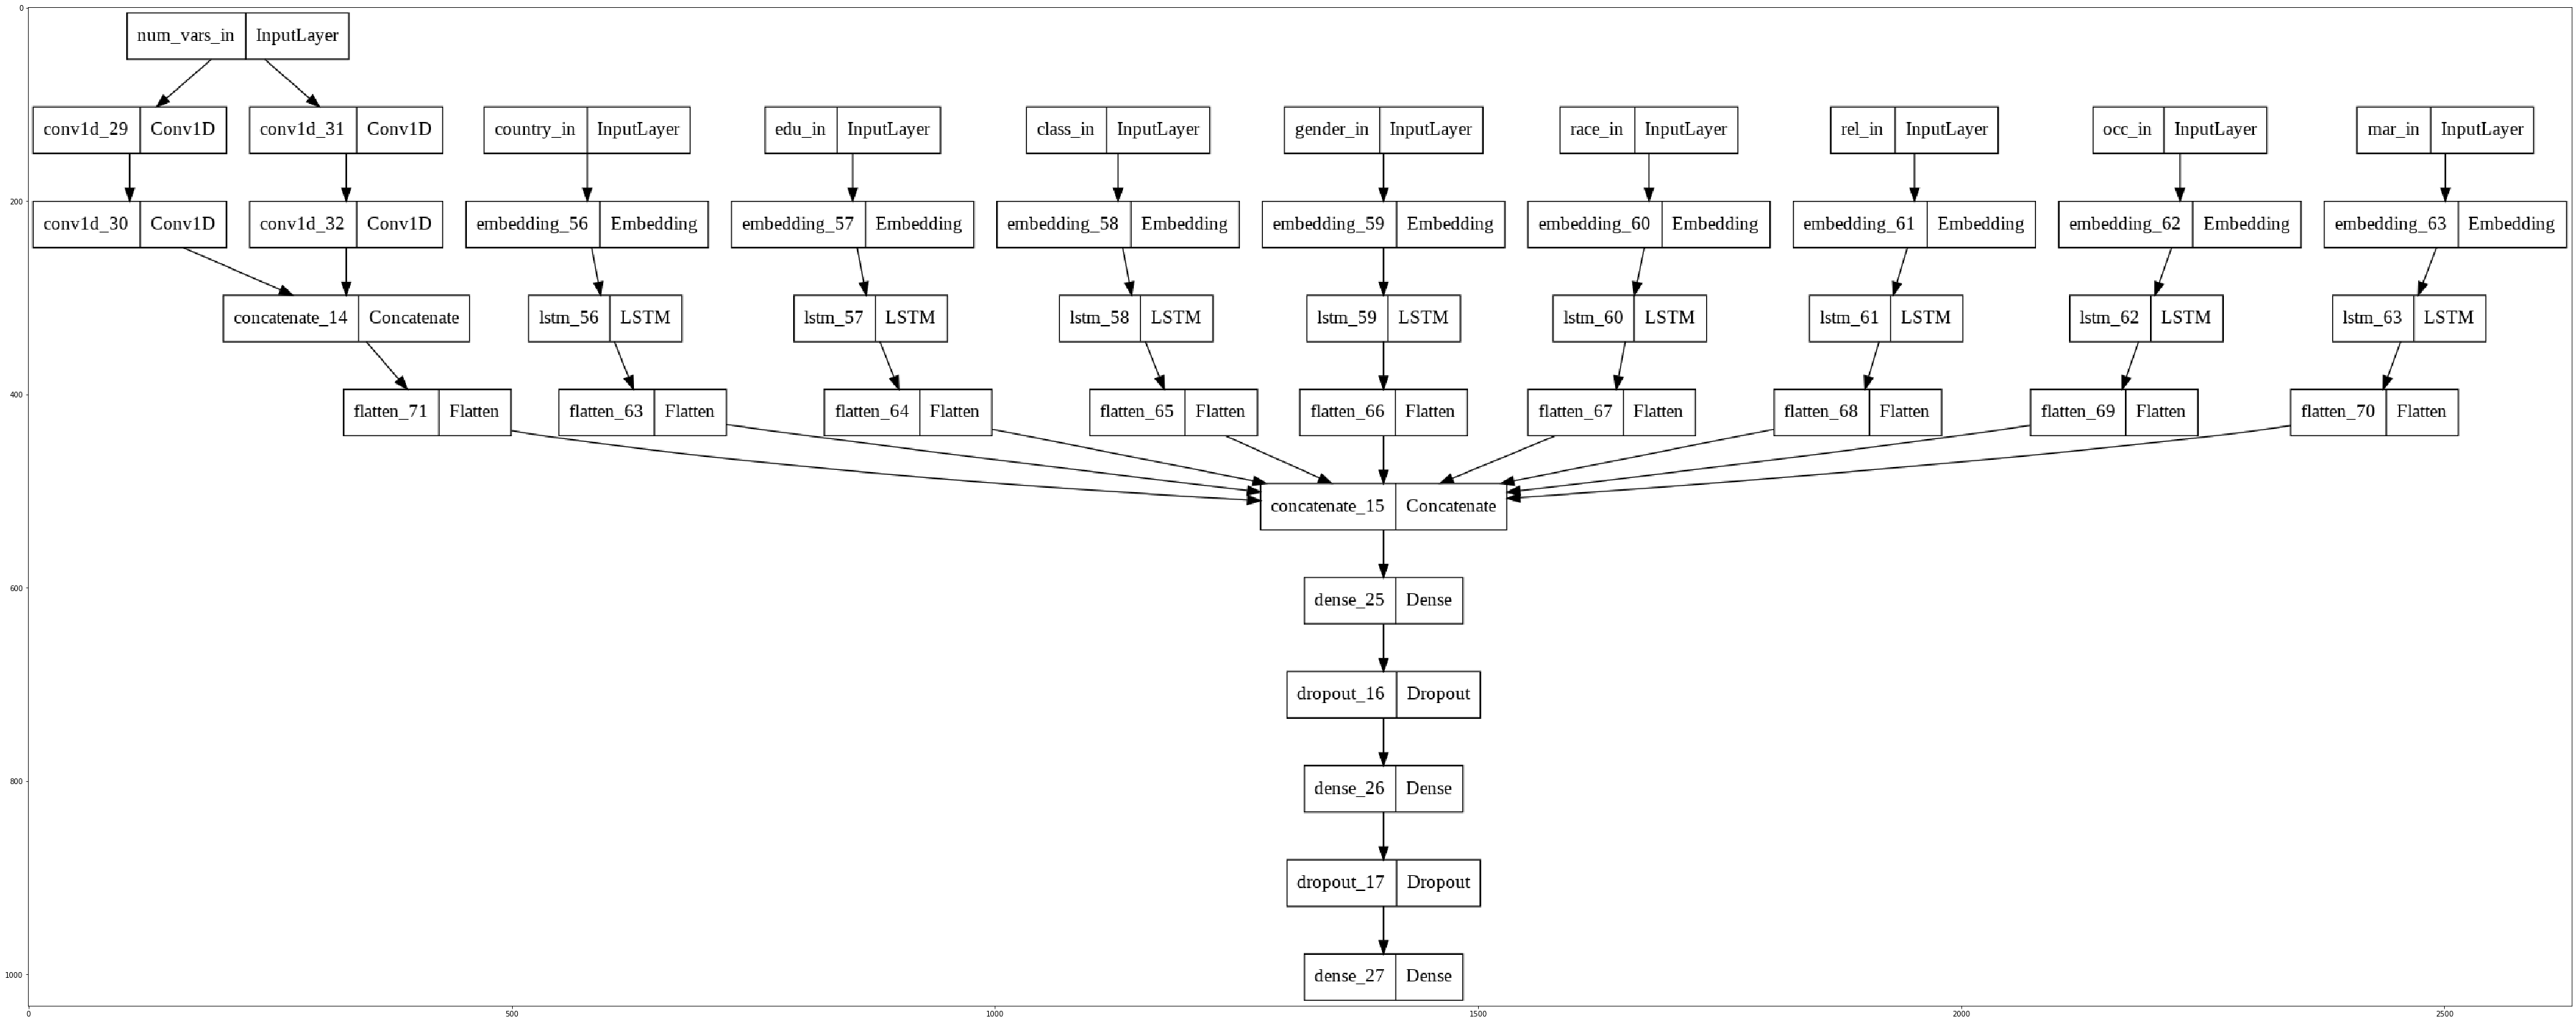

In [ ]:
plt.figure(figsize = (50,50));
plot_model(model, to_file = "model.png");
io.imshow("model.png");

In [ ]:
BATCH_SIZE = 200
epochs = 10

In [ ]:
start = time.time()
history= model.fit(X_train,
                   dtrain.income_level,
                   epochs=epochs,
                   batch_size=BATCH_SIZE,
                   validation_data=(X_valid, dvalid.income_level),
                   verbose=1,
                   callbacks= get_callbacks()
                  )

end = time.time()

Epoch 1/10
218/218 [==============================] - 30s 64ms/step - loss: 0.8834 - accuracy: 0.2893 - val_loss: 0.8138 - val_accuracy: 0.2205
Epoch 2/10
218/218 [==============================] - 10s 45ms/step - loss: 0.7590 - accuracy: 0.2926 - val_loss: 0.7119 - val_accuracy: 0.2205
Epoch 3/10
218/218 [==============================] - 9s 43ms/step - loss: 0.6798 - accuracy: 0.5624 - val_loss: 0.6445 - val_accuracy: 0.7795
Epoch 4/10
218/218 [==============================] - 10s 44ms/step - loss: 0.6267 - accuracy: 0.7604 - val_loss: 0.5984 - val_accuracy: 0.7795
Epoch 5/10
218/218 [==============================] - 6s 29ms/step - loss: 0.5913 - accuracy: 0.7604 - val_loss: 0.5674 - val_accuracy: 0.7795
Epoch 6/10
218/218 [==============================] - 5s 24ms/step - loss: 0.5691 - accuracy: 0.7604 - val_loss: 0.5465 - val_accuracy: 0.7795
Epoch 7/10
218/218 [==============================] - 5s 24ms/step - loss: 0.5532 - accuracy: 0.7604 - val_loss: 0.5321 - val_accuracy: 0.7

In [ ]:
val_preds = model.predict(X_valid)

#val_preds = target_scaler.inverse_transform(val_preds) 

In [ ]:
print(val_preds[:10, 0])  # Convert to 1D
y_pred = val_preds[:,0]

[0.26249868 0.26249802 0.27558178 0.26249796 0.26249796 0.26266053
 0.26249796 0.26249796 0.3276002  0.3170256 ]


In [ ]:
preds = model.predict(X_test, batch_size=BATCH_SIZE)

print(preds[:10])

[[0.3276872]
 [0.3276872]
 [0.3276872]
 [0.3276872]
 [0.3276872]
 [0.3276872]
 [0.3276872]
 [0.3276872]
 [0.3276872]
 [0.3276872]]


In [ ]:
print('Outputs shape')    
print(preds.shape) # prints (n,1) but  need (n,)
preds=np.transpose(preds)[0]  # transformation to get (n,)
print(preds.shape)  # now the shape is (n,)
# Applying transformation to get binary values predictions with 0.5 as thresold


Outputs shape
(899, 1)
(899,)


In [ ]:
preds = list(map(lambda x: 0 if x<0.3 else 1, preds))

In [ ]:
test["income_level"] = preds

In [ ]:
y_test=test["income_level"]

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

8/8 [==============================] - 0s 8ms/step - loss: 0.3970 - accuracy: 1.0000
test loss, test acc: [0.3970314860343933, 1.0]


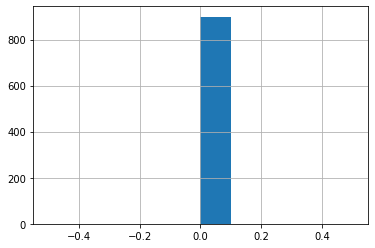

In [ ]:
test.to_csv("./myNNsubmission.csv", index=False)
test.income_level.hist()